To visualise the area surveyed, refer to this illustration. The flowerbeds lie on an inclined surface (about 15 degrees slope) and is situated within 50m of a river, which is located northwards past the main gate. 
![survey-area](area-schematic.png)

# Packages used (Run this for the program to work)

If you have any problems or would like to request for further data from this notebook, please contact me at https://github.com/engwbc <br />

In [137]:
from collections import Counter
import os
from os import path
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Functions (also run this)

In [330]:
#Opens a file path containing data and converts it into a dataframe with a frequency column.
def readFile(file):
    survey = open(path.abspath(file),'r').read()
    survey_list = list(survey.split("\n"))
    survey_list = [e for e in survey_list if e not in ('')] #removes ''
    for species in survey_list:
        freq = Counter(survey_list)
    species_df = pd.DataFrame.from_dict(freq,orient='index').reset_index()
    species_df.columns = species_df.columns.str.strip()
    species_df.rename(columns = {'index':'species'},inplace=True) #a duplicate data frame was being made, force apply to current one with inplace
    species_df.columns = species_df.columns.fillna('frequency') #replace NaN column with freq
    return species_df

#Create a set to select for only one entry of the recorded species (no duplicates)
def fileToSet(file):
    survey = open(file,'r').read()
    _unique_species_ = set([s for s in survey.split("\n") if s not in ('')])
    return _unique_species_

#Adds imported files into a list
def fileToList(file):
    survey = open(file,'r').read()
    survey_list = list(survey.split("\n"))
    survey_list = [e for e in survey_list if e not in ('')]
    return survey_list

def importSections(file,file2,file3):
    top_df = readFile(file)
    top_df.name = file
    mid_df = readFile(file2)
    mid_df.name = file2
    bot_df = readFile(file3)
    bot_df.name = file3
    section_list = [top_df,mid_df,bot_df]
    return section_list

#Sorted values (high to low)
def SortDf(df):
    return df.loc[:].sort_values('frequency',ascending=False)

def sortListDf(_list):
    return [SortDf(df.loc[:]) for df in _list]

def txtToDf(file,df_name):
    imported_file = readFile(file)
    imported_sorted = SortDf(imported_file)
    imported_sorted.name = df_name
    return imported_sorted

#Plotting function
def barplots(df,plot_title,_palette):
    fig,axes = plt.subplots(figsize=(8,8),dpi=150)
    sns.barplot(x='frequency',y = 'species',data=df,palette=_palette).set(title=plot_title)
    axes.set(xlim=(0,15))
    axes.set(xlabel = "Frequency", ylabel = "Species")
    sns.despine(right=True)
    fig.tight_layout()
    
#Plot subtitles for each flowerbed section
subplot_sectiontitles = ['Top','Middle','Bottom']

def PlotsubBar(df,plot_title,int):
    sns.set_context('notebook',rc={'axes.titlesize':15})
    sns.barplot(ax=axes[int],x=df['frequency'],y=df['species']).set(title=plot_title)

def plotandPalette(df):
    pal0 = sns.color_palette('Blues_r', 40) #palette, no. of data
    pal1 = sns.color_palette('YlGn_r', 50)
    pal2 = sns.color_palette('Reds_r', 50)
    n = 0
    for df in df:
        if n == 0: 
            sns.set_palette(pal0)
        elif n == 1:
            sns.set_palette(pal1)
        else:
            sns.set_palette(pal2)
        PlotsubBar(SortDf(df),subplot_sectiontitles[0+n],n)
        n+=1

def printList(_list):
    for element in _list:
        print(element)

#Exports left and right flowerbed counts from March and April to an output folder
def ExportDfCsv(df):
    df.to_csv(os.path.join('output/biodiversity/',df.name +'.csv'),index=False,header=False)
    
#Exports section counts to output folder 
def ExportListCsv(_list):
    for df in _list:
        df_name = re.sub('(input)|(biodiversity-)|(ph-)|\/|\.txt$','',df.name) #Regex to remove raw input filename
        df.loc[:].to_csv(os.path.join('output/biodiversity/',df_name +'.csv'),index=False,header=False)

# Entire flowerbed - March
Importing spreadsheets for March data. **Make sure the following files are in the same directory as this notebook:**
1. ```survey1.txt```
2. ```survey2.txt```
3. ```survey3.txt```
4. ```survey4.txt```

In [162]:
entire_dataframes = []
#Right side
march_rightsorted = txtToDf("input/biodiversity-input/survey1.txt",'march_right_sorted')

#Sorted by frequency (high to low)
march_rightsorted.head() #Preview what the data frame will look like

,species,frequency
0,Creeping Thistle,9
1,Garlic Mustard,9
6,Sticky Weed,5
8,Common Sheep Weed,4
4,Dock,4


For the data frame above, you should see that creeping thistle and garlic mustard are the top hits (9 counts).

In [163]:
#Left side
march_leftsorted = txtToDf('input/biodiversity-input/survey2.txt',"march_left_sorted")
march_leftsorted.head()

,species,frequency
9,Garlic Mustard,15
5,Dock,10
19,Sticky Weed,9
12,Groundsel,6
1,Grass,6


For the left sorted table you should see garlic mustard as the top hit (15 counts).

# Entire flowerbed - April

In [164]:
#Right side
april_rightsorted = txtToDf('input/biodiversity-input/survey3.txt','april_right_sorted')
april_rightsorted.head()

,species,frequency
2,Garlic Mustard,9
5,Dock,9
16,Groundsel,8
3,Daffodils,7
7,Purple Dead Nettle,7


The data frame above should have garlic mustard and dock as the top hit (9 counts). 

In [165]:
#Left side
april_leftsorted = txtToDf('input/biodiversity-input/survey4.txt','april_left_sorted')
april_leftsorted.head()

,species,frequency
0,Dandelions,14
4,Geranium,12
21,Red Dead Nettle,11
1,Dock,11
9,Sticky Weed,10


The data frame (april_leftsorted) should have dandelions as the top hit (14 counts).

In [166]:
try:
    entire_dataframes=[march_rightsorted,march_leftsorted,april_rightsorted,april_leftsorted]
except NameError:
    raise
len(entire_dataframes) #If 4 - then you have loaded in all of the above files needed.

4

In [167]:
#Comparing total number of species between seasons using sets
survey1_species = fileToSet('input/biodiversity-input/survey1.txt')
survey2_species = fileToSet('input/biodiversity-input/survey2.txt')
survey3_species = fileToSet('input/biodiversity-input/survey3.txt')
survey4_species = fileToSet('input/biodiversity-input/survey4.txt')
union_survey1_3 = list(survey1_species)+list(survey3_species)
union_survey2_4 = list(survey2_species)+list(survey4_species)

#Right bed
right_bed_unique_march = list(survey1_species.difference(survey3_species))
print("Species unique in March (right bed):",right_bed_unique_march,"\n")
right_bed_unique_april = list(survey3_species.difference(survey1_species))
print("Species unique in April (right bed):",right_bed_unique_april,"\n")
right_common_march_april = list(survey3_species.intersection(survey1_species))#Common species found in both Mar/Apr
print("Species found in March and April:",right_common_march_april,"\n")

#Left bed
left_bed_unique_march = list(survey2_species.difference(survey4_species))
print("Species unique in March (left bed):",left_bed_unique_march,"\n")
left_bed_unique_april = list(survey4_species.difference(survey2_species))
print("Species unique in April (left bed):",left_bed_unique_april,"\n")
left_common_march_april = list(survey4_species.intersection(survey2_species)) #Common species found in both Mar/Apr
print("Species found in March and April (left bed):",left_common_march_april)


Species unique in March (right bed): ['Crocus', 'Fern', 'Persian Speedwell', 'Watercress', 'Lamiaceae', 'Crepidinae', 'Soft rush', 'Creeping Thistle', 'Heather', 'Common Sheep Weed', 'Wood Aven'] 

Species unique in April (right bed): ['Iris', 'Ash Tree', "Snake's Head", 'Clovers', 'Bluebells', 'Chinese Quince', 'Barberries', 'Spindle', 'Rose Bush', 'Snowberry', 'Wood Craves Bill', 'Heath', 'Grass', 'Australian Silky Oak', 'Buttercups', 'Violet', 'Bittercress', 'Daisy', 'Mint', 'Purple Dead Nettle', 'Forget Me Nots', 'Heaths', 'Hazel', 'Speedwell', 'Poppies', 'Thistle'] 

Species found in March and April: ['Hazel Tree', 'Bluebell', 'Mullein', 'Daffodils', 'Stinking Iris', 'Ramson', 'Sticky Weed', 'Tansy', 'Dicots', 'Garlic Mustard', 'Silver Birch', 'Geranium', 'Dock', "Shepherd's Purse", 'Groundsel', 'Dandelions', 'Nettle'] 

Species unique in March (left bed): ['Persian Speedwell', 'Avens', 'Tursan tree', 'Yew', 'Bedstraws', 'Monocot', 'Bedstraw', 'Ferns', 'Brambles', 'Mouse or chuckw

In [168]:
print("Right unique March:",len(right_bed_unique_march),"total species")
print("Left unique March:",len(left_bed_unique_march),"total species\n")

print("Right unique April:",len(right_bed_unique_april),"total species")
print("Left unique April:",len(left_bed_unique_april),"total species")

Right unique March: 11 total species
Left unique March: 30 total species

Right unique April: 26 total species
Left unique April: 42 total species


In [169]:
#Species found in both beds.
left_right_common = list(set(left_common_march_april).intersection(set(right_common_march_april)))
print(left_right_common)

['Mullein', 'Daffodils', 'Sticky Weed', 'Geranium', 'Dock', "Shepherd's Purse", 'Groundsel', 'Dandelions', 'Nettle', 'Garlic Mustard']


**For ```printList()``` function:** <br /> change parameter to ```right_bed_unique_march```, ```right_bed_unique_april``` or ```right_common_march_april``` to look at the other lists for other months/beds. But they have already been printed below.

In [170]:
printList(left_right_common)
print(len(left_right_common))

Mullein
Daffodils
Sticky Weed
Geranium
Dock
Shepherd's Purse
Groundsel
Dandelions
Nettle
Garlic Mustard
10


In [171]:
#Right bed
printList(right_common_march_april) 
print(len(right_common_march_april))

Hazel Tree
Bluebell
Mullein
Daffodils
Stinking Iris
Ramson
Sticky Weed
Tansy
Dicots
Garlic Mustard
Silver Birch
Geranium
Dock
Shepherd's Purse
Groundsel
Dandelions
Nettle
17


In [172]:
#Left bed
printList(left_common_march_april)
print(len(left_common_march_april))

Herb Robert
Shepherd's Purse
Tutsan
Yarrow
Daffodils
Parsley
Grass
Geranium
Dock
Nettle
Garlic Mustard
Galium Mollugo
Sticky Weed
Red Dead Nettle
Dandelions
Mullein
Hazel
Groundsel
Speedwell
19


In [173]:
def PercentIncrease(before,after):
    print(f"Survey\t: No. of species\nBefore: {len(before)}\nAfter: {len(after)}")
    percent_increase = ((len(after)-len(before))/len(before)*100)
    return percent_increase
#Compare between March and April for Right and Left beds
#Right bed
survey3_perinc = round(PercentIncrease(survey1_species,survey3_species),2)
print(f"Survey 3: +{survey3_perinc}%\n")
#Left bed
survey2_percinc = round(PercentIncrease(survey2_species,survey4_species),2)
print(f"Survey 2: +{survey2_percinc}%")


Survey	: No. of species
Before: 28
After: 43
Survey 3: +53.57%

Survey	: No. of species
Before: 49
After: 61
Survey 2: +24.49%


# Species sorted by section - 02 & 11 March 2023 

In [324]:
#Right side (02 March 2023)
marsurvey1_dataframes = importSections('input/biodiversity-input/right_top_march.txt','input/biodiversity-input/right_mid_march.txt','input/biodiversity-input/right_bot_march.txt')
for df in marsurvey1_dataframes:
    print(df.head())

            species  frequency
0  Creeping Thistle          3
1    Garlic Mustard          3
2        Crepidinae          1
3        Hazel Tree          1
4              Dock          2
             species  frequency
0     Garlic Mustard          5
1  Common Sheep Weed          2
2          Daffodils          3
3          Groundsel          1
4          Wood Aven          1
             species  frequency
0  Persian Speedwell          1
1               Dock          1
2     Garlic Mustard          1
3             Dicots          2
4   Creeping Thistle          1


In [323]:
#Left side (11 March 2023)
marsurvey2_dataframes = importSections('input/biodiversity-input/left_top_march.txt','input/biodiversity-input/left_mid_march.txt','input/biodiversity-input/left_bot_march.txt')
for df in marsurvey2_dataframes:
    print(df.head())

             species  frequency
0             Nettle          1
1              Grass          4
2          Verburnum          1
3  Japanese Snowball          1
4         Dandelions          2
             species  frequency
0     Garlic Mustard          5
1        Sticky Weed          5
2         Dandelions          1
3          Bedstraws          2
4  Persian Speedwell          1
          species  frequency
0     Sticky Weed          2
1  Garlic Mustard          5
2         Ragwort          1
3       Groundsel          1
4        Bedstraw          2


# Species sorted by section - April 2023

In [321]:
#19 April 2023
aprilsurvey3_dataframes = importSections('input/biodiversity-input/right_top_march.txt','input/biodiversity-input/right_mid_march.txt','input/biodiversity-input/right_bot_march.txt')
for df in aprilsurvey3_dataframes:
    print(df.head())

            species  frequency
0  Creeping Thistle          3
1    Garlic Mustard          3
2        Crepidinae          1
3        Hazel Tree          1
4              Dock          2
             species  frequency
0     Garlic Mustard          5
1  Common Sheep Weed          2
2          Daffodils          3
3          Groundsel          1
4          Wood Aven          1
             species  frequency
0  Persian Speedwell          1
1               Dock          1
2     Garlic Mustard          1
3             Dicots          2
4   Creeping Thistle          1


In [322]:
#26 April 2023
aprilsurvey4_dataframes = importSections('input/biodiversity-input/left_top_april.txt','input/biodiversity-input/left_mid_april.txt','input/biodiversity-input/left_bot_april.txt')
for df in aprilsurvey4_dataframes:
    print(df.head())

      species  frequency
0  Dandelions          5
1        Dock          3
2       Rubus          1
3  Blackberry          1
4    Geranium          5
          species  frequency
0  Cherry Blossom          1
1  Forget Me Nots          2
2      Dandelions          4
3            Lily          1
4         Thistle          3
       species  frequency
0      Mullein          1
1  Sticky Weed          5
2      Thistle          2
3   Dandelions          5
4    Daffodils          1


In [313]:
#Sort to descending order
sorted_marsurvey1_dataframes = sortListDf(marsurvey1_dataframes)
sorted_marsurvey2_dataframes = sortListDf(marsurvey2_dataframes)
sorted_aprilsurvey3_dataframes = sortListDf(aprilsurvey3_dataframes)
sorted_aprilsurvey4_dataframes = sortListDf(aprilsurvey4_dataframes)

In [320]:
sorted_marsurvey1_dataframes[0].name

AttributeError: 'DataFrame' object has no attribute 'name'

# Plotting and file export

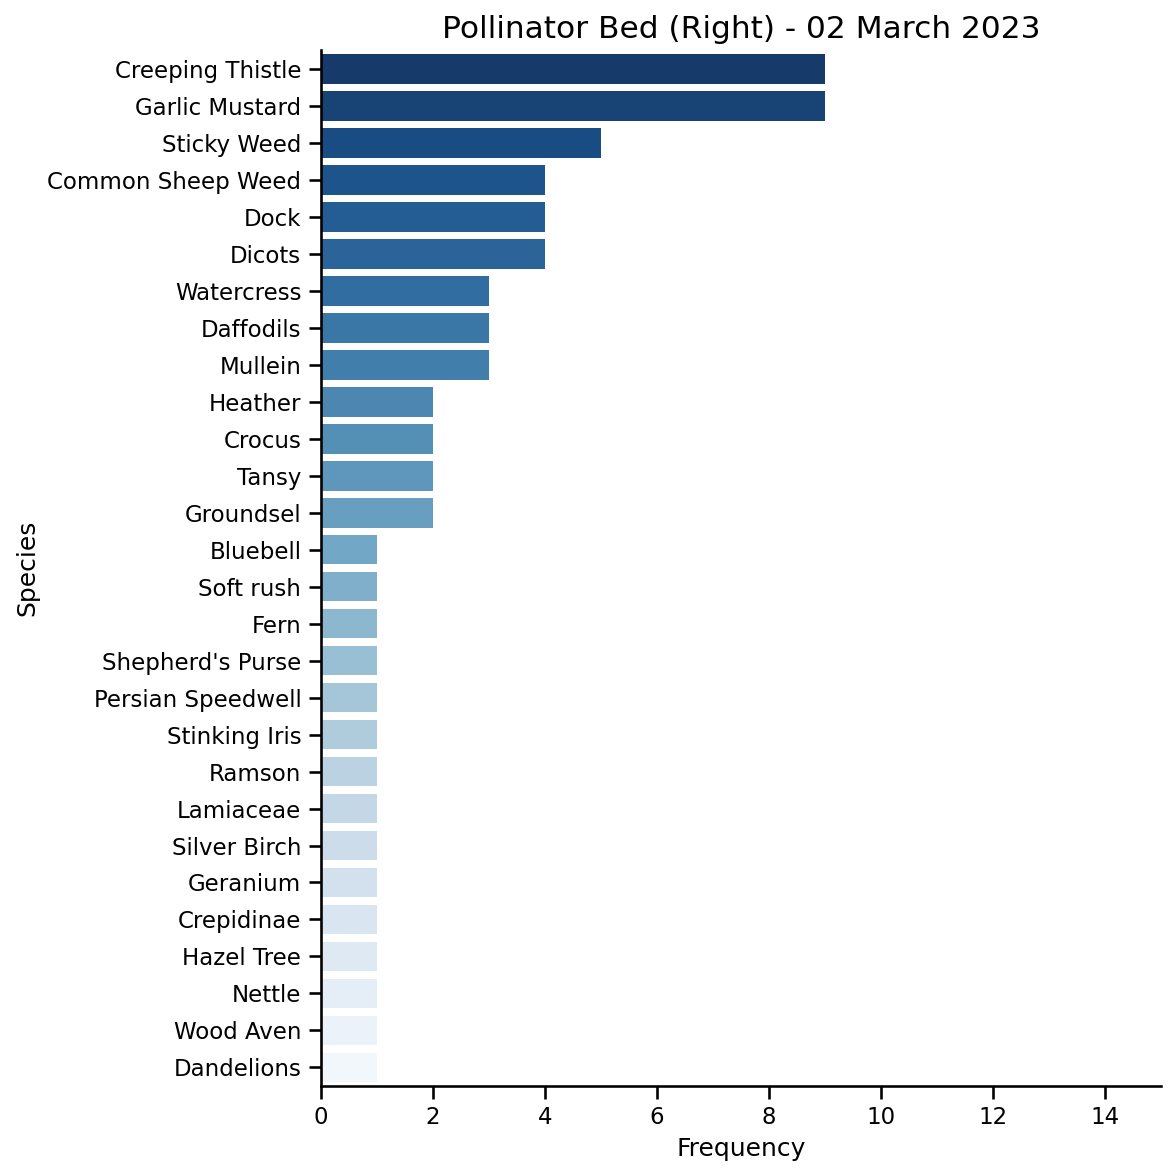

In [293]:
right_march_plot = barplots(march_rightsorted,'Pollinator Bed (Right) - 02 March 2023','Blues_r')
plt.show()

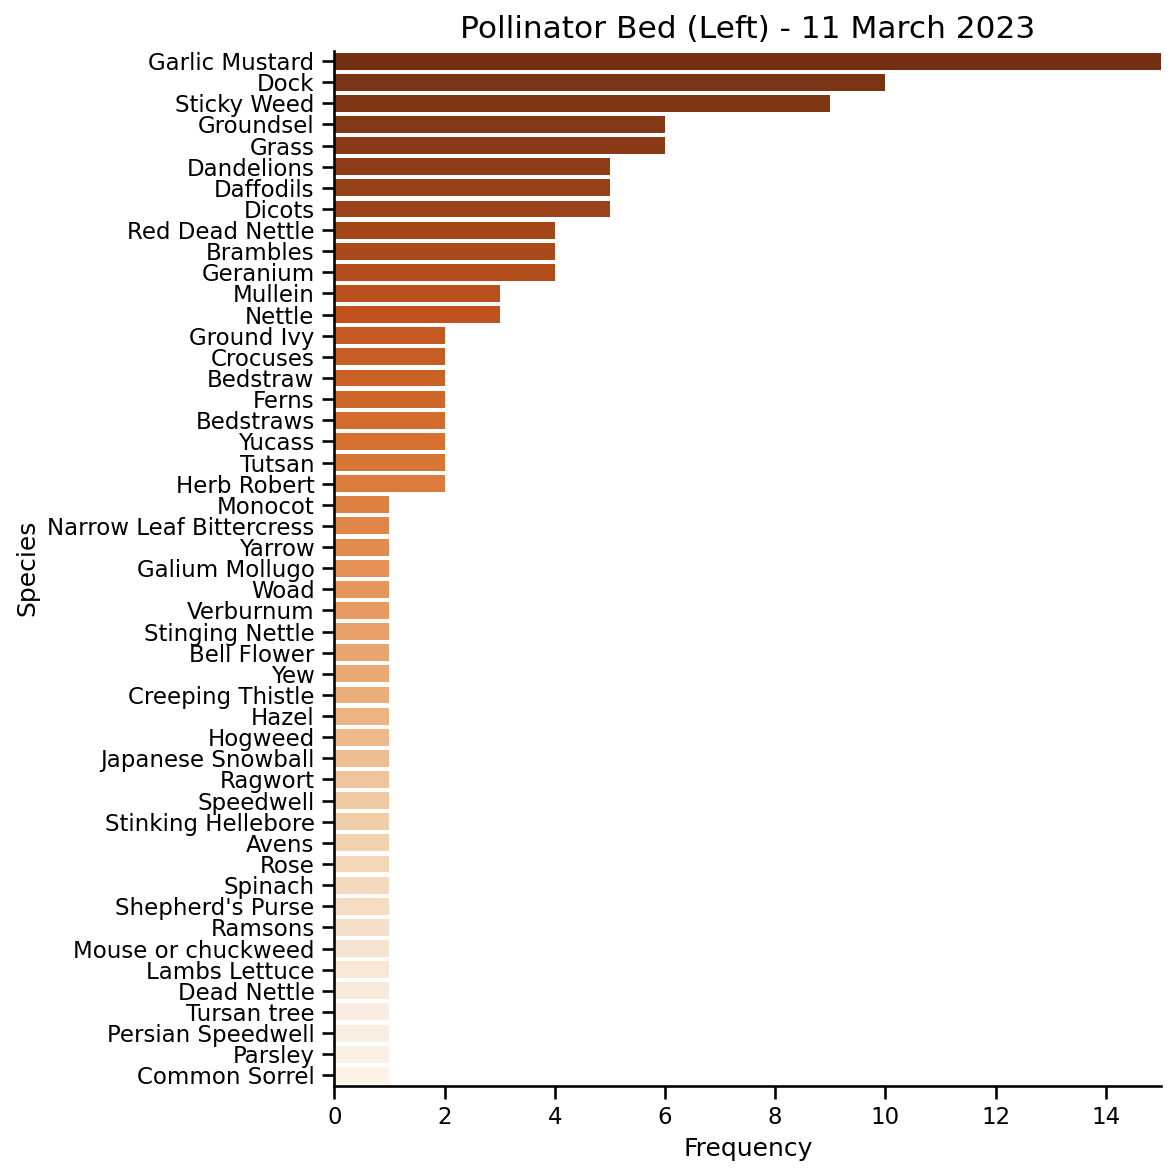

In [252]:
left_march_plot = barplots(march_leftsorted,'Pollinator Bed (Left) - 11 March 2023',"Oranges_r")
sns.color_palette("flare_r",as_cmap=True)
plt.show()

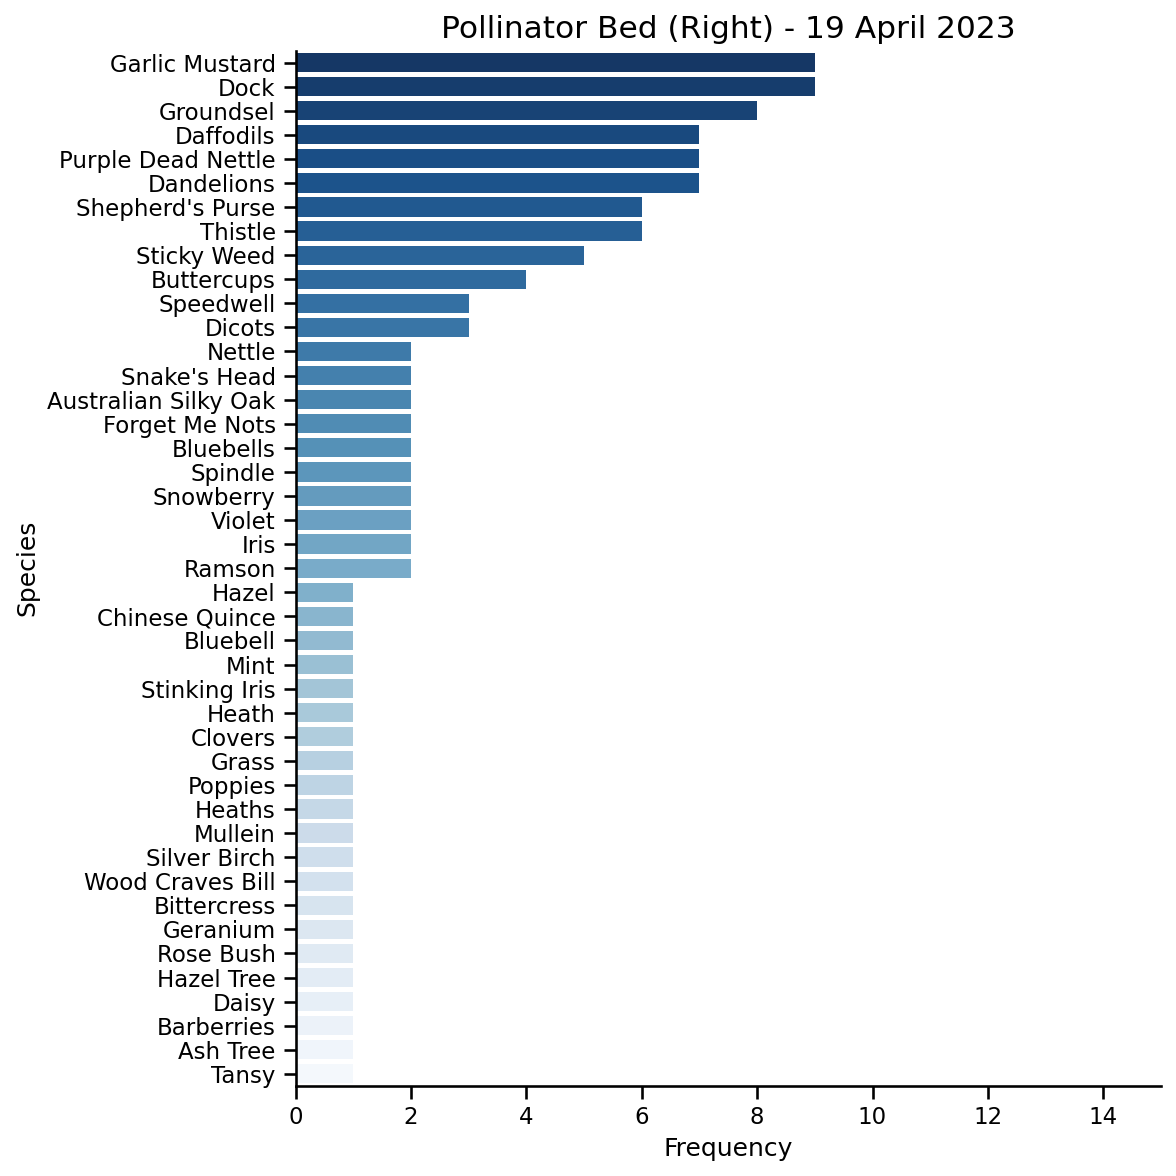

In [253]:
right_april_plot = barplots(april_rightsorted,'Pollinator Bed (Right) - 19 April 2023',"Blues_r")

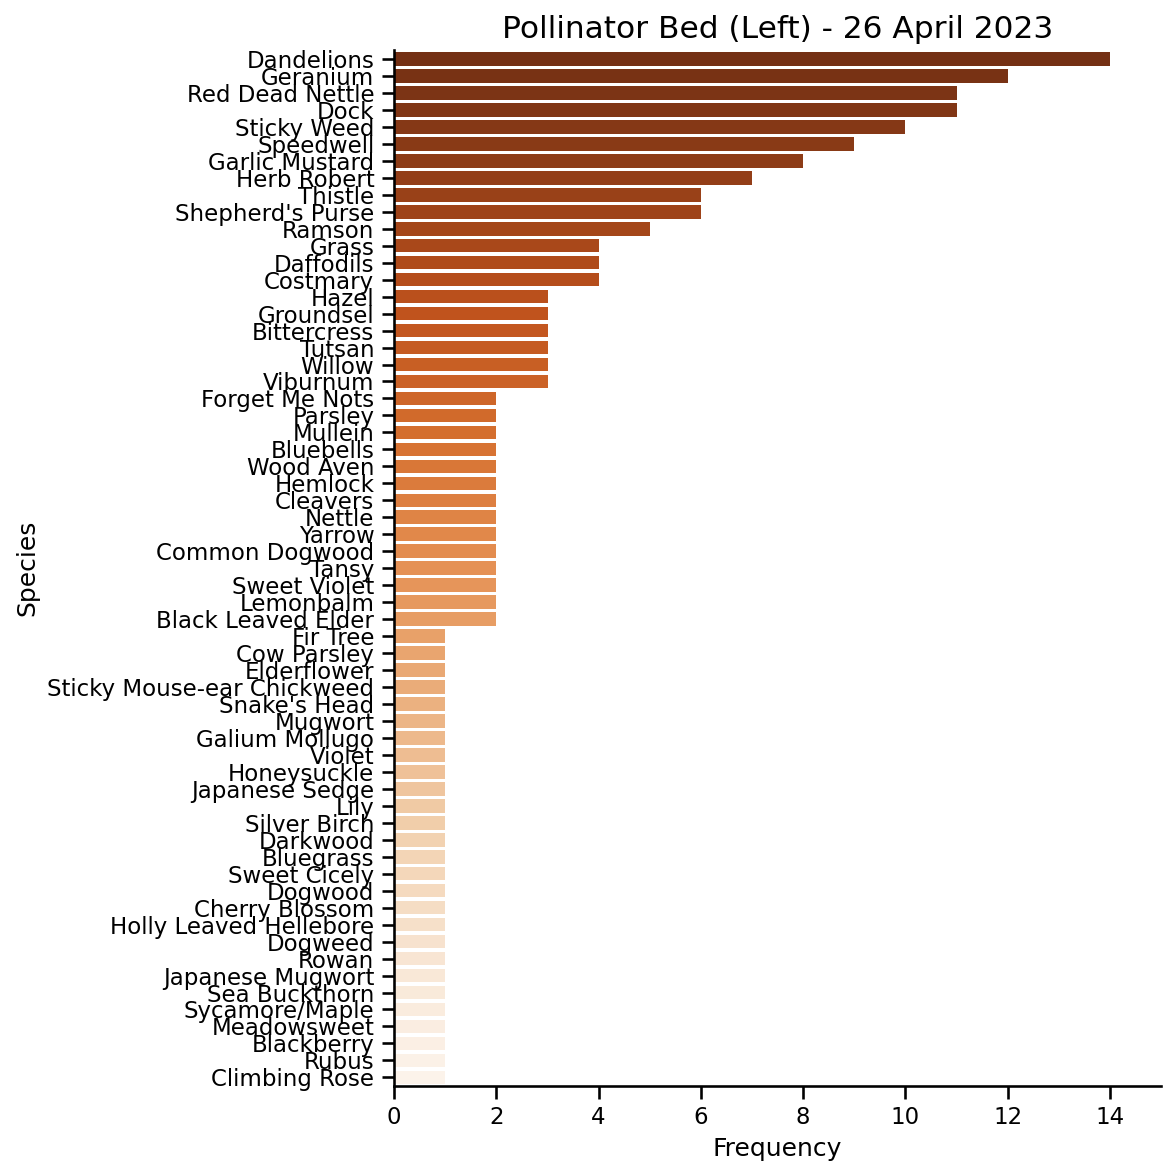

In [254]:
left_april_plot = barplots(april_leftsorted,'Pollinator Bed (Left) - 26 April 2023',"Oranges_r")

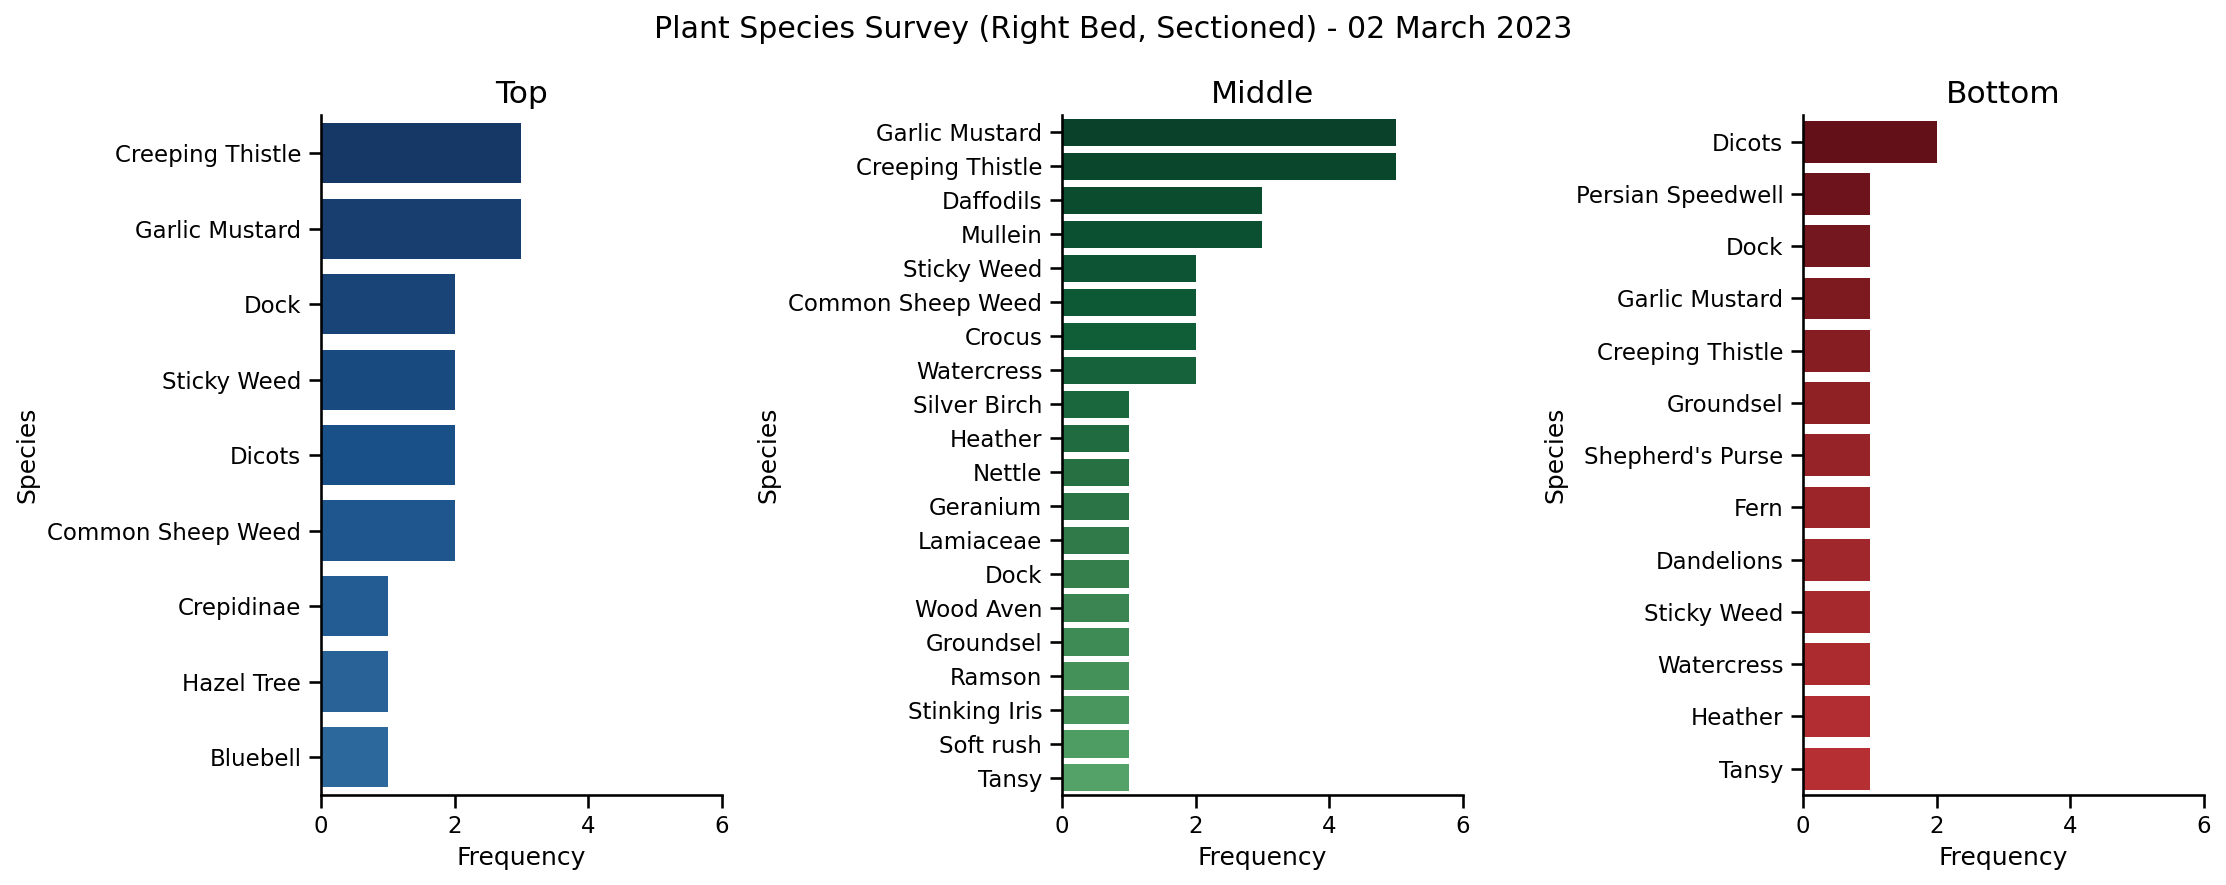

In [294]:
#02 March survey
fig,axes = plt.subplots(nrows = 1, ncols = 3, dpi=150,sharex=True,figsize=(15,6))
plotandPalette(sorted_marsurvey1_dataframes)
fig.suptitle('Plant Species Survey (Right Bed, Sectioned) - 02 March 2023')
for ax in axes:
    ax.set(xlabel='Frequency',ylabel='Species')
    ax.set(xlim=(0,6))
    sns.despine(right=True)
fig.tight_layout()

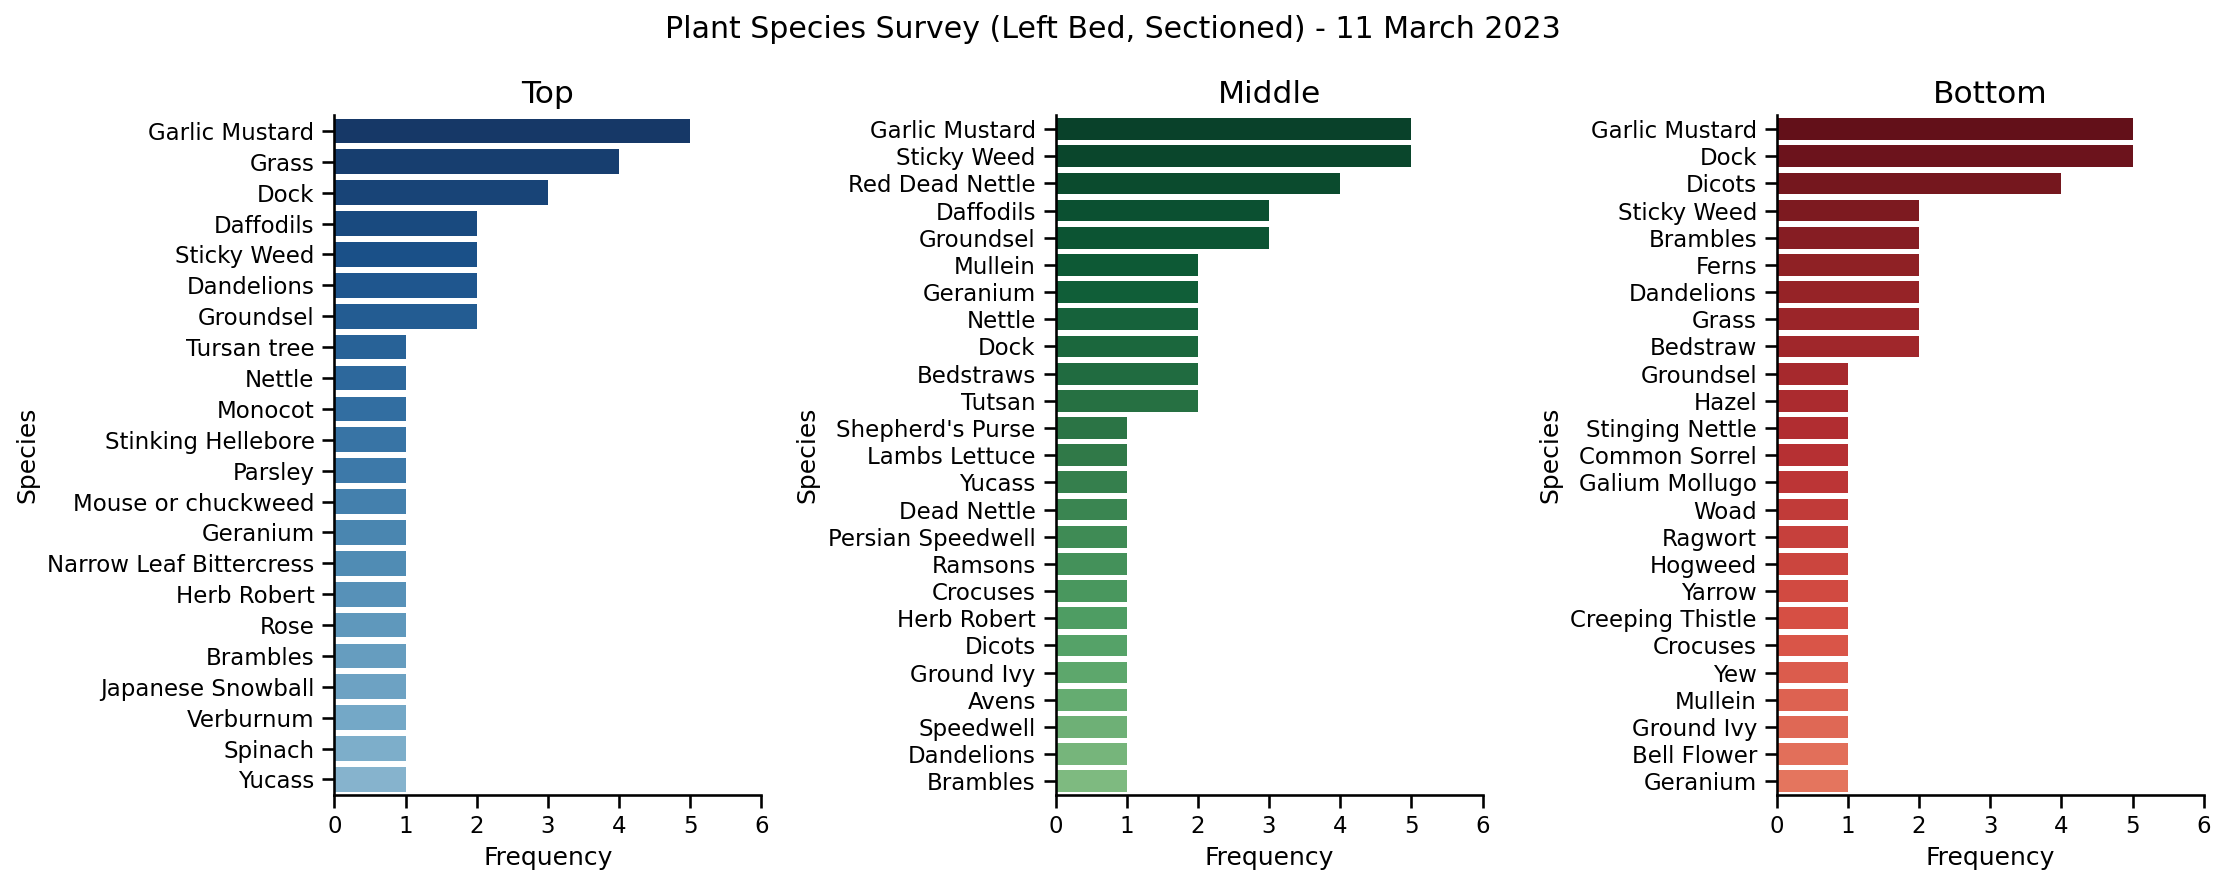

In [295]:
#11 March survey
fig,axes = plt.subplots(nrows = 1, ncols = 3, dpi=150,sharex=True,figsize=(15,6))
plotandPalette(sorted_marsurvey2_dataframes)
fig.suptitle('Plant Species Survey (Left Bed, Sectioned) - 11 March 2023')
for ax in axes:
    ax.set(xlabel='Frequency',ylabel='Species')
    ax.set(xlim=(0,6))
    sns.despine(right=True)
fig.tight_layout()

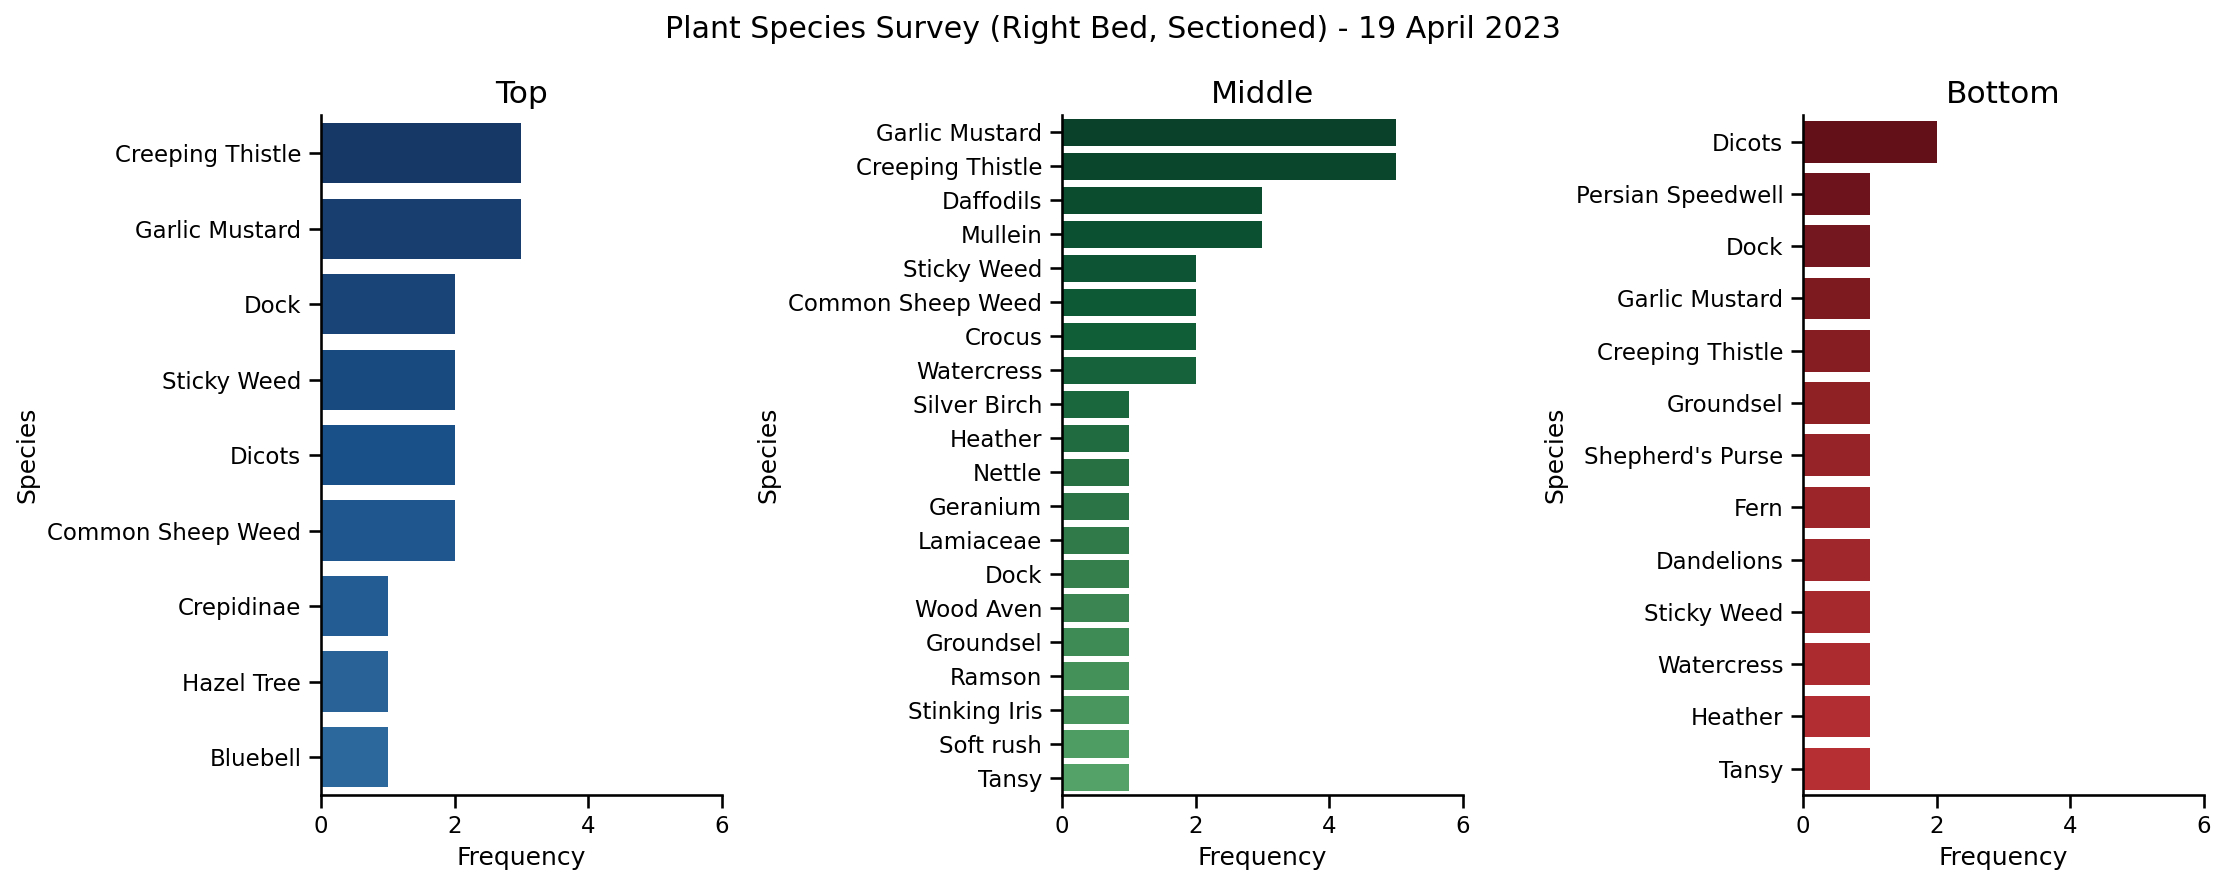

In [296]:
#19 April
fig,axes = plt.subplots(nrows = 1, ncols = 3, dpi=150,sharex=True,figsize=(15,6))
plotandPalette(sorted_aprilsurvey3_dataframes)
fig.suptitle('Plant Species Survey (Right Bed, Sectioned) - 19 April 2023')
for ax in axes:
    ax.set(xlabel='Frequency',ylabel='Species')
    ax.set(xlim=(0,6))
    sns.despine(right=True)
fig.tight_layout()

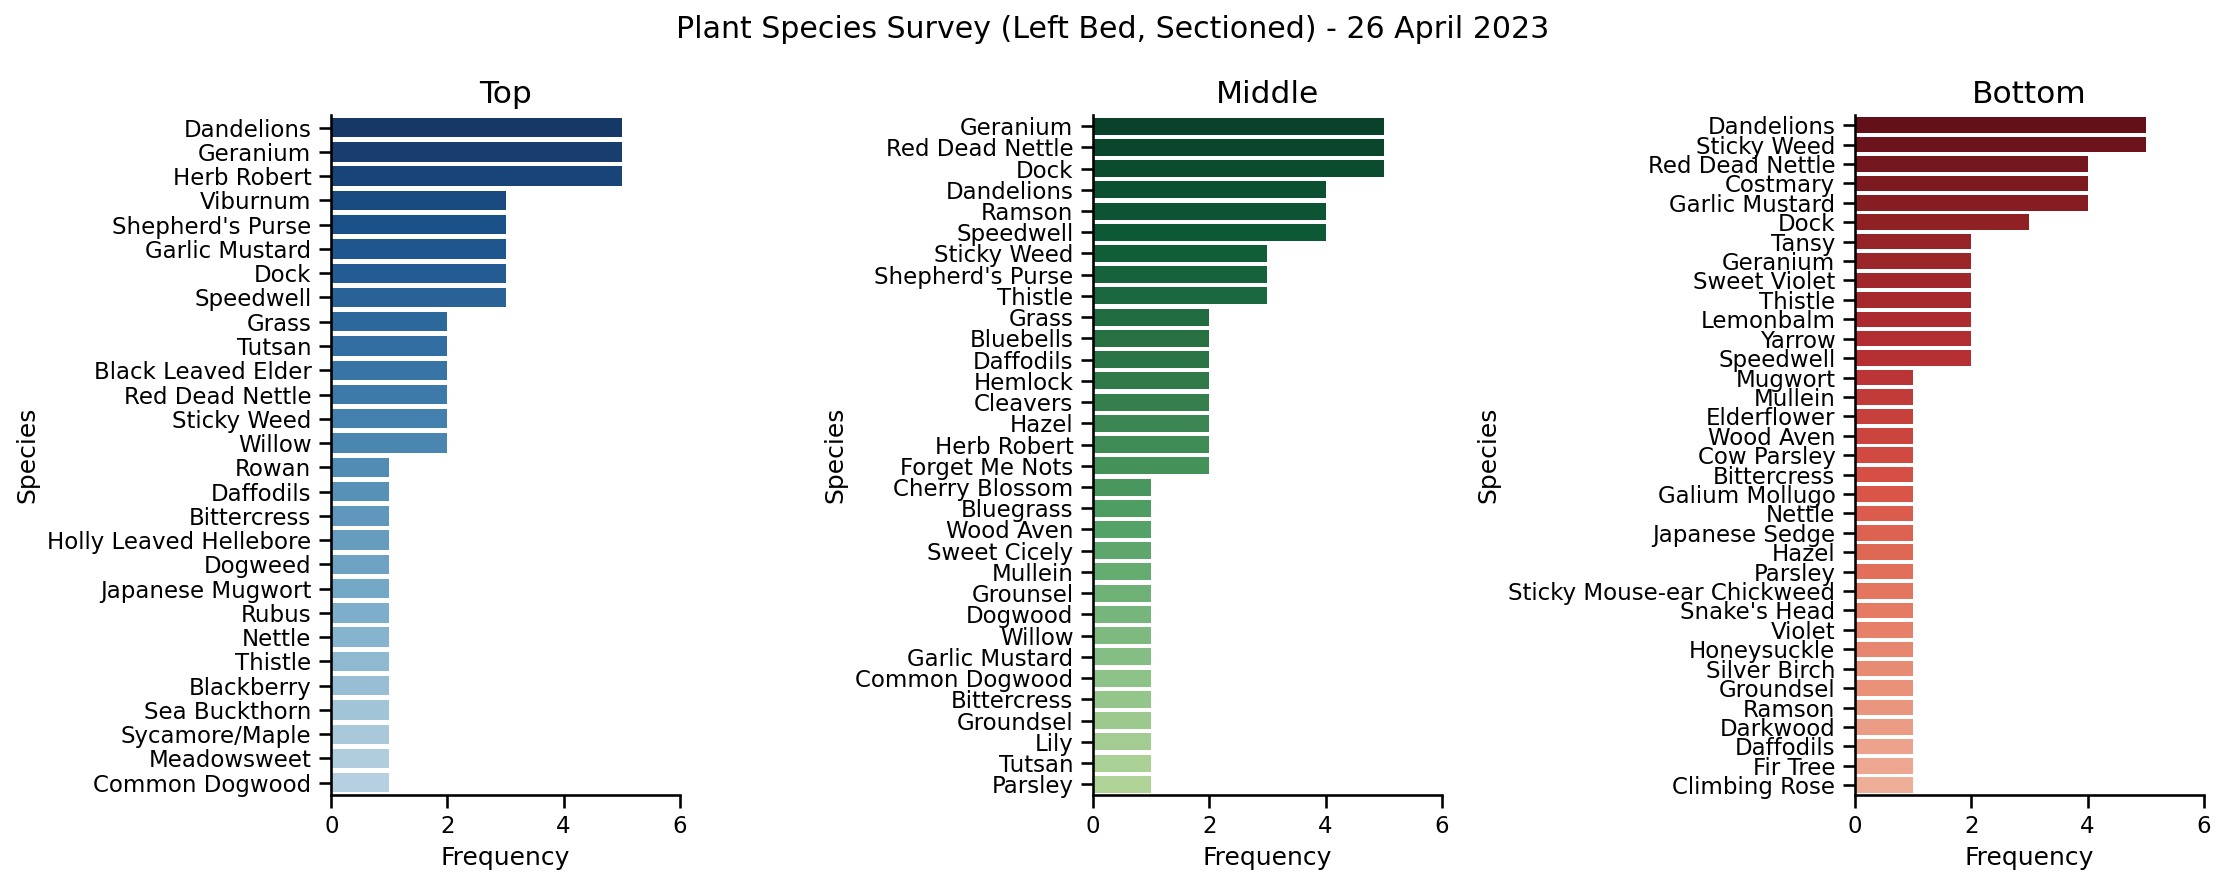

In [297]:
#26 April 2023
fig,axes = plt.subplots(nrows = 1, ncols = 3, dpi=150,sharex=True,figsize=(15,6))
plotandPalette(sorted_aprilsurvey4_dataframes)
fig.suptitle('Plant Species Survey (Left Bed, Sectioned) - 26 April 2023')
for ax in axes:
    ax.set(xlabel='Frequency',ylabel='Species')
    ax.set(xlim=(0,6))
    sns.despine(right=True)
fig.tight_layout()

**If you want to save the results into csv files run the box below**

In [218]:
for dat in entire_dataframes:
    ExportDfCsv(dat)

**Flowerbed per section** <br />
Save each flowerbed section as a csv file.

**Pandas limitation:** <br /> Dataframe names do not survive pickling, quick workaround is to export the unsorted section counts.

In [329]:
ExportListCsv(marsurvey1_dataframes)
ExportListCsv(marsurvey2_dataframes)
ExportListCsv(aprilsurvey3_dataframes)
ExportListCsv(aprilsurvey4_dataframes)